<a href="https://colab.research.google.com/github/yeongju98/YBIGTA/blob/main/19%EA%B8%B0_%EA%B2%BD%EC%A0%9C%ED%95%99%EA%B3%BC_%EC%A7%80%EC%98%81%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀분석 과제
22 July 2021(Thu)

---

제출 형식: 본인 Github에 다음과 같은 파일명으로 두 개의 파일을 업로드하시면 됩니다.  
- 19기_학과명_이름.ipynb  
- graduate_submission.csv

# 구글 드라이브 mount **(Colab을 사용하는 경우에만 해당)**
Jupyter Notebook을 사용하시는 경우 이 부분은 무시하고 진행하시면 됩니다.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 목표: 대학원 합격 확률 및 합격 여부 예측

- 회귀: 학습 데이터로 선형 회귀, Ridge, Lasso를 통해 학습시켜 봅시다.

완성된 모델로 테스트 데이터의 **합격 여부**를 예측해보세요. (합격 여부를 예측하는 것은 분류 문제입니다.)  
아래의 빈칸(코드+서술 답안)을 모두 채워 넣어주시면 됩니다.  
"## TODO"라고 적힌 부분에는 코드를 작성하여 주시고, "A."라고 적힌 부분에는 서술 답안을 작성하여 주세요.  
이를 모두 완성한 **(1) ipynb 파일**과 최종 예측을  **(2) csv 파일**로 저장하여 본인 Github에 업로드하시면 됩니다.

In [3]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 로드 및 확인
graduate_train.csv 파일과 graduate_test.csv 파일을 My Drive에 넣어주세요.  
(Jupyter Notebook을 사용하시는 경우에는 graduate_train.csv 파일과 graduate_test.csv 파일 경로를 각각의 로컬 디렉토리 위치로 변경해주세요.)

In [5]:
# train 데이터 불러오기
df = pd.read_csv("/content/gdrive/MyDrive/YBIGTA/교육세션/0722_통계회귀/과제/graduate_train.csv")

# train 데이터 크기 확인
print("data size:", df.shape)

# train 데이터 훑어보기
df.head(10)

data size: (400, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,No,0.71
1,307,105,2,2.5,4.5,8.12,Yes,0.67
2,329,111,4,4.5,4.0,9.01,Yes,0.81
3,300,105,1,1.0,2.0,7.80,No,0.58
4,329,114,5,4.0,5.0,9.30,Yes,0.86
5,300,104,3,3.5,3.0,8.16,No,0.71
6,318,103,3,4.0,4.5,8.49,Yes,0.71
7,322,110,4,4.0,5.0,9.13,Yes,0.86
8,315,105,2,2.0,2.5,7.65,No,0.39
9,332,119,4,5.0,4.5,9.24,Yes,0.90


In [6]:
# test 데이터 불러오기
test = pd.read_csv("/content/gdrive/MyDrive/YBIGTA/교육세션/0722_통계회귀/과제/graduate_test.csv")

# test 데이터 크기 확인
print("data size:", test.shape)

# test 데이터 훑어보기
test.head(10)

# test 데이터에는 'Chance of Admit'이 없습니다. 이 확률을 예측해보는 것이 과제입니다.

data size: (100, 7)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,304,103,5,5.0,4.0,8.64,No
1,297,96,2,2.5,1.5,7.89,No
2,302,101,2,2.5,3.5,7.96,No
3,318,112,3,4.0,3.5,8.67,No
4,304,100,4,1.5,2.5,7.84,No
5,330,116,4,5.0,4.5,9.45,Yes
6,315,110,2,3.5,3.0,8.46,Yes
7,317,107,3,4.0,3.0,8.70,No
8,330,114,3,4.5,4.5,9.24,Yes
9,323,111,5,4.0,5.0,9.86,Yes


# 1. 결측치

데이터에 결측치가 있는지 확인해보세요.

In [7]:
## TODO
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Q. 데이터에 결측치가 있나요? 어떤 방법으로 처리하였나요?  
A. 결측치는 없습니다. isnull()함수를 이용하여 확인하였습니다.

# 2. 범주형 변수

설명변수 중 범주형 변수가 존재하나요?  
존재한다면 어떻게 처리해주어야 할까요?  
**학습 데이터를 수정하는 경우 테스트 데이터도 그에 맞게 수정해주어야 된다는 점에 유의하세요.**

In [8]:
## TODO
df.info()
df = pd.get_dummies(df)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    object 
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.1+ KB


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Research_No,Research_Yes
0,310,105,2,3.0,3.5,8.01,0.71,1,0
1,307,105,2,2.5,4.5,8.12,0.67,0,1
2,329,111,4,4.5,4.0,9.01,0.81,0,1
3,300,105,1,1.0,2.0,7.80,0.58,1,0
4,329,114,5,4.0,5.0,9.30,0.86,0,1


Q. 어떤 변수가 범주형인가요? 어떻게 처리해 주었나요?  
A. Research변수가 범주형입니다. info()함수를 이용하여 Dtype을 확인 후 더미변수로 변환

# 3. 선형(Linear) 회귀

In [9]:
# 먼저 데이터를 설명변수와 종속변수로 분리합니다.
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

In [10]:
# 데이터를 train과 test로 분리하여 사용합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [11]:
# 각각의 크기 확인
print("training predictors size:", X_train.shape)
print("training response size:", y_train.shape)
print("test predictors size:", X_test.shape)
print("test response size:", y_test.shape)

training predictors size: (320, 8)
training response size: (320,)
test predictors size: (80, 8)
test response size: (80,)


### 3.1. scikit-learn으로 선형 회귀

In [12]:
from sklearn.linear_model import LinearRegression

In [53]:
# 1. 먼저 모델을 만들어 줍니다.
## TODO
linear = LinearRegression()

# 2. 모델을 적합시킵니다.
## TODO
linear.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print('Training R^2: %.7f' %linear.score(X_train, y_train))


Training R^2: 0.8259835


#### 3.1.1. 모델의 MSE와 R^2를 구해봅시다.

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
# 4. X_test로 y_pred를 만들어줍니다.
## TODO

y_pred = linear.predict(X_test)


print('MSE: %.5f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.5f' % r2_score(y_test, y_pred))

MSE: 0.00396
Variance score: 0.77291


In [36]:
test = pd.get_dummies(data=test)

In [37]:
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_No,Research_Yes
0,304,103,5,5.0,4.0,8.64,1,0
1,297,96,2,2.5,1.5,7.89,1,0
2,302,101,2,2.5,3.5,7.96,1,0
3,318,112,3,4.0,3.5,8.67,1,0
4,304,100,4,1.5,2.5,7.84,1,0


In [41]:
len(test)

100

In [38]:
y_pred_test = linear.predict(test)

In [39]:
y_pred_test

array([0.70258112, 0.51206205, 0.58082549, 0.73993942, 0.54795028,
       0.91529284, 0.71570512, 0.71495876, 0.87816877, 0.93590065,
       0.84695884, 0.9121856 , 0.87833677, 0.96204894, 0.64910929,
       0.9620521 , 0.86282582, 0.66317849, 0.70115406, 0.50535975,
       0.94984013, 0.79650947, 0.76062334, 0.73605636, 0.69274107,
       0.77136863, 0.47949309, 0.72408959, 0.78340562, 0.95308057,
       0.5840202 , 0.76822929, 0.68631108, 0.69950655, 0.83197871,
       0.64876132, 0.75628155, 0.70086338, 0.94203852, 0.69068569,
       0.64342306, 0.55213101, 0.60506033, 0.91093929, 0.81560263,
       0.82229079, 0.53779689, 0.53369156, 0.86603926, 0.95687242,
       0.64560032, 0.70504659, 0.60190899, 0.9051678 , 0.67564701,
       0.75298116, 0.85776624, 0.7091244 , 0.85649405, 0.64346589,
       0.83872788, 0.58764723, 0.88246157, 0.82824973, 0.86360539,
       0.74479882, 0.64488574, 0.51156892, 0.93944696, 0.66191985,
       0.53507804, 0.67619289, 0.64159675, 0.74392279, 0.51339

#### 3.1.2. 모델의 절편 계수를 확인해봅시다.

In [16]:
## TODO

print('intercept:', linear.intercept_)


intercept: -1.2419421437018687


Q. 절편 계수의 의미는 무엇인가요?  
A. 모든 독립변수들이 0일 때 chance of admit의 추정값이 절편이다. 그런데 모든 독립변수가 0인 것은 가능하지만 chance of admit이 음수일 수는 없으므로 모델을 수정할 필요가 있다.

#### 3.1.3. 모델의 기울기 계수를 확인해 보세요.

In [17]:
## TODO

beta = pd.DataFrame(linear.coef_, index=X.columns, columns=['slope'])
beta

,slope
GRE Score,0.001640
TOEFL Score,0.003606
University Rating,0.002748
SOP,0.007253
LOR,0.017343
CGPA,0.112079
Research_No,-0.013241
Research_Yes,0.013241


Q. 기울기 계수의 의미는 무엇인가요? 어떤 예측변인이 대학원 합격 확률과 유의미한 관계를 가지고 있으며 이것을 어떻게 해석할 수 있나요?  
A. 기울기 계수의 절댓값은 해당 변수와 종속변수간의 상관관계의 정도를 나타내며, 양수일 경우 양의 상관관계, 음수일 경우 음의 상관관계를 가진 것으로 해석할 수 있다. 그 상관관계가 통계적으로 유의한지는 이것만으로는 알 수 없고, F검정과 t검정을 통해 전체 회귀모형과 개별 계수의 유의성을 검정하여야 한다.

#### 3.1.4. 연속형 설명변수 중 하나를 골라 종속변수와의 관계를 scatter plot으로 그려 보세요.

[]

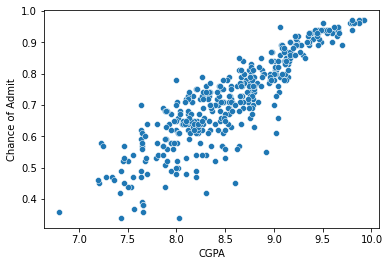

In [18]:
## TODO

sns.scatterplot(x="CGPA", y="Chance of Admit", data=df)
plt.plot()

#### 3.1.5. 범주형 설명변수와 종속변수의 관계를 box plot으로 그려 보세요.

[]

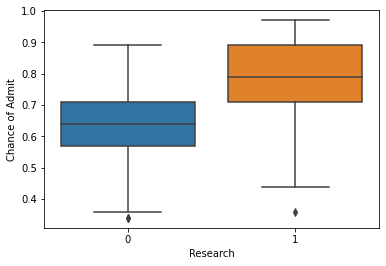

In [19]:
## TODO
sns.boxplot(x='Research_Yes', y='Chance of Admit', data=df)
plt.xlabel('Research')
plt.plot()

### 3.2. StatsModels로 선형 회귀 시행하기

In [20]:
import statsmodels.api as sm

In [ ]:
## TODO

model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     211.6
Date:                Mon, 26 Jul 2021   Prob (F-statistic):          1.99e-114
Time:                        10:59:00   Log-Likelihood:                 449.18
No. Observations:                 320   AIC:                            -882.4
Df Residuals:                     312   BIC:                            -852.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score             0.0016      0.001      2.571      0.011       0.000       0.003
TOEFL Score           0.0036      0.001      3.161      0.002       0.001       0.006
University Rating     0.0027      0.005      0.582      0.561      -0.007       0.012
SOP                   0.0073      0.006      1.273      0.204      -0.004       0.018
LOR                   0.0173      0.005      3.391      0.001       0.007       0.027
CGPA                  0.1121      0.012      9.237      0.000       0.088       0.136
Research_No          -1.2552      0.132     -9.498      0.000      -1.515      -0.995
Research_Yes         -1.2287      0.136     -9.065      0.000      -1.495      -0.962
==============================================================================
Omnibus:                       72.061   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.598
Skew:                          -1.110   Prob(JB):                     2.99e-36
Kurtosis:                       5.710   Cond. No.                     1.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Q. R^2와 F-statistic을 고려해 볼 때, 이 모델은 좋은 모델이라고 볼 수 있나요?  
A. R^2와 F통계량만을 보면, 꽤 좋은 모델이라고 할 수 있다.

Q. 계수에 대한 가설 검정 결과를 바탕으로 'University Rating'이 대학원 합격률에 미치는 영향을 어떻게 해석할 수 있을까요?  
A. 영향이 거의 무의미하다고 해석할 수 있다.

# 4. Ridge, Lasso 회귀

이번에는 scikit-learn으로 Ridge와 Lasso를 시도해 보세요.  
**가장 적절한 수준의 alpha를 찾아 모델에 적용해 보세요.**  
(힌트: cross-validation을 사용하세요.)  
(참고자료:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

In [55]:
from sklearn.linear_model import RidgeCV

# 1. 먼저 모델을 만들어 줍니다.
## TODO
ridge = RidgeCV(alphas = [0.05, 0.01, 0.001])

# 2. 모델을 적합시킵니다.
## TODO
ridge.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print('Training R^2: %.7f'%ridge.score(X_train, y_train))

print("intercept:", ridge.intercept_)
beta = pd.DataFrame(ridge.coef_, index=X_train.columns, columns=["slope"])
print(beta)

print('----------------------------------------------------------')
print('Testing R^2: %.5f'% ridge.score(X_test, y_test))



Training R^2: 0.8259833
intercept: -1.2423809325199908
                      slope
GRE Score          0.001645
TOEFL Score        0.003612
University Rating  0.002762
SOP                0.007271
LOR                0.017361
CGPA               0.111858
Research_No       -0.013235
Research_Yes       0.013235
----------------------------------------------------------
Testing R^2: 0.77282


In [50]:
from sklearn.linear_model import LassoCV

# 1. 먼저 모델을 만들어 줍니다.
## TODO
lasso = LassoCV(alphas=[0.05, 0.01, 0.001])

# 2. 모델을 적합시킵니다.
## TODO
lasso.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print('Training R^2: %.5f'% lasso.score(X_train, y_train))

print("intercept:", lasso.intercept_)
beta = pd.DataFrame(lasso.coef_, index=X_train.columns, columns=["slope"])
print(beta.sort_values("slope"))

print('--------------------------------------------------------------------')
print('Testing R^2: %.5f'% lasso.score(X_test, y_test))


Training R^2: 0.82531
intercept: -1.3074311280577857
                          slope
Research_No       -2.109332e-02
Research_Yes       1.414522e-18
GRE Score          2.016379e-03
University Rating  2.952840e-03
TOEFL Score        3.937461e-03
SOP                6.997193e-03
LOR                1.767293e-02
CGPA               1.028328e-01
--------------------------------------------------------------------
Testing R^2: 0.77027


In [43]:
y_pred_test_lasso = lasso.predict(test)

In [44]:
y_pred_test_lasso

array([0.69893041, 0.50959511, 0.58190846, 0.74394251, 0.55089938,
       0.91281476, 0.71422898, 0.71648734, 0.87689351, 0.92596636,
       0.8444426 , 0.91030421, 0.87902457, 0.95982414, 0.65435971,
       0.96360755, 0.85789706, 0.66912436, 0.70366335, 0.50410051,
       0.94816692, 0.7951636 , 0.75605872, 0.73859425, 0.68840067,
       0.77375731, 0.48878833, 0.7219131 , 0.78075151, 0.95092106,
       0.59181624, 0.76442109, 0.681395  , 0.70118945, 0.8317475 ,
       0.6447172 , 0.75541597, 0.70089489, 0.93911214, 0.69163286,
       0.64685004, 0.55103668, 0.59884788, 0.91115525, 0.8114609 ,
       0.81511935, 0.53905163, 0.53368725, 0.86552142, 0.95283066,
       0.64703864, 0.70261549, 0.60643162, 0.90067838, 0.67723646,
       0.74456873, 0.86140641, 0.70867574, 0.8530565 , 0.64676041,
       0.84239432, 0.58108341, 0.88241209, 0.82698186, 0.86268797,
       0.74405489, 0.65143248, 0.51293461, 0.9385684 , 0.66610961,
       0.54710663, 0.66955209, 0.64121252, 0.75020749, 0.51238

In [45]:
y_pred_test_ridge = ridge.predict(test)

In [46]:
y_pred_test_ridge

array([0.70254812, 0.51198819, 0.58082715, 0.73996769, 0.54797352,
       0.91526899, 0.71571098, 0.71493591, 0.87815675, 0.93572701,
       0.84694836, 0.91215994, 0.87839938, 0.96199954, 0.6490869 ,
       0.96207225, 0.86277251, 0.66328948, 0.70121587, 0.50529866,
       0.94983035, 0.79649953, 0.76047751, 0.73616103, 0.69271312,
       0.77141968, 0.47962217, 0.72410338, 0.78335578, 0.95301499,
       0.58415106, 0.76817977, 0.68617567, 0.6995454 , 0.83200667,
       0.64872908, 0.75621278, 0.70077757, 0.94197273, 0.69067962,
       0.64355415, 0.55207636, 0.60500117, 0.91098555, 0.81553659,
       0.82216838, 0.53776999, 0.53365425, 0.86602829, 0.956807  ,
       0.64553862, 0.70501112, 0.6019502 , 0.90511075, 0.67557949,
       0.75286298, 0.85783979, 0.70907716, 0.85646501, 0.6434704 ,
       0.83873532, 0.58756787, 0.88247157, 0.82828414, 0.86361219,
       0.74479623, 0.64497565, 0.51161805, 0.93946331, 0.66197172,
       0.53527282, 0.67608526, 0.64152918, 0.74395423, 0.51333

In [56]:
y_pred_test

array([0.70258112, 0.51206205, 0.58082549, 0.73993942, 0.54795028,
       0.91529284, 0.71570512, 0.71495876, 0.87816877, 0.93590065,
       0.84695884, 0.9121856 , 0.87833677, 0.96204894, 0.64910929,
       0.9620521 , 0.86282582, 0.66317849, 0.70115406, 0.50535975,
       0.94984013, 0.79650947, 0.76062334, 0.73605636, 0.69274107,
       0.77136863, 0.47949309, 0.72408959, 0.78340562, 0.95308057,
       0.5840202 , 0.76822929, 0.68631108, 0.69950655, 0.83197871,
       0.64876132, 0.75628155, 0.70086338, 0.94203852, 0.69068569,
       0.64342306, 0.55213101, 0.60506033, 0.91093929, 0.81560263,
       0.82229079, 0.53779689, 0.53369156, 0.86603926, 0.95687242,
       0.64560032, 0.70504659, 0.60190899, 0.9051678 , 0.67564701,
       0.75298116, 0.85776624, 0.7091244 , 0.85649405, 0.64346589,
       0.83872788, 0.58764723, 0.88246157, 0.82824973, 0.86360539,
       0.74479882, 0.64488574, 0.51156892, 0.93944696, 0.66191985,
       0.53507804, 0.67619289, 0.64159675, 0.74392279, 0.51339

In [57]:
graduate_submission = test.copy()
graduate_submission['Chance of Admit'] = y_pred_test
graduate_submission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_No,Research_Yes,Chance of Admit
0,304,103,5,5.0,4.0,8.64,1,0,0.702581
1,297,96,2,2.5,1.5,7.89,1,0,0.512062
2,302,101,2,2.5,3.5,7.96,1,0,0.580825
3,318,112,3,4.0,3.5,8.67,1,0,0.739939
4,304,100,4,1.5,2.5,7.84,1,0,0.547950


In [59]:
for i in range(0, len(graduate_submission)):
  if graduate_submission['Chance of Admit'][i] >= 0.5:
    graduate_submission['Chance of Admit'][i] = '합격'
  else:
    graduate_submission['Chance of Admit'][i] = '불합격'

graduate_submission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_No,Research_Yes,Chance of Admit
0,304,103,5,5.0,4.0,8.64,1,0,합격
1,297,96,2,2.5,1.5,7.89,1,0,합격
2,302,101,2,2.5,3.5,7.96,1,0,합격
3,318,112,3,4.0,3.5,8.67,1,0,합격
4,304,100,4,1.5,2.5,7.84,1,0,합격


In [60]:
graduate_submission.to_csv('/content/gdrive/MyDrive/YBIGTA/교육세션/0722_통계회귀/과제/graduate_submission.csv',sep=',',index=False)